This project examines the demographics of CA Department of Rehabilitation clients who participated in Goodwill Central Coast programs from 2019-2021. Data was cleaned and modified with the primary purpose of creating a variety of demographic graphs and charts that were ultimately inserted into a report.    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_excel("CARF_Demo.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CARF_Service       71 non-null     object        
 1   dob                59 non-null     datetime64[ns]
 2   ethnicity          69 non-null     object        
 3   city               69 non-null     object        
 4   lanuage            71 non-null     object        
 5   department_number  72 non-null     object        
 6   start_date         72 non-null     datetime64[ns]
 7   site               56 non-null     object        
 8   gender             72 non-null     object        
 9   enrollment_status  71 non-null     object        
dtypes: datetime64[ns](2), object(8)
memory usage: 5.8+ KB


Clean and Convert Data Types

In [4]:
df['dob'] = pd.DatetimeIndex(df['dob']).year #Convert dob field into a year

In [5]:
df['start_date'] = pd.DatetimeIndex(df['start_date']).year #Convert start_date field into a year

In [6]:
#Create uniformity in ethnicity values
df['ethnicity'] = df['ethnicity'].replace({"white/asian": "Asian", "Sudan":"Black", "Latino":"Hispanic",
                         "African American":"Black", "Puerto Rican and African American":"Black", 
                         "Hispanic/White":"Hispanic","Two or more":"","white":"White","native american":
                                           "Native American"})


In [7]:
#create uniformity in values
df["gender"] = df['gender'].replace("Female", "F") 

df["lanuage"] = df["lanuage"].replace({"Enlgish":"English", "English - Limited":"English", 
                                       'Spanish/English':"English", "English/Spanish":"English"})

df['site'] = df['site'].replace("11/27/21",np.nan) #replaced a value with a null

df['site'] = df['site'].replace({'San Luis Obispo':'SLO', 'HQ':'Salinas', 'N. Main':'Salinas'})

df["city"] = df['city'].replace("San Luis Obispo","SLO")

df['enrollment_status'] = df['enrollment_status'].replace({"completed":"Completed", 
"Complete hired on":"Completed", "":np.nan,
"Dropped": "Did not Complete", "Closed; non participation":"Did not Complete",
'Complete':'Completed', 'Cancelled/Did not start':np.nan,
"Pend Referral/Consent form":np.nan, 'Pend Assessment date':np.nan,'Pause in Program':'Active'})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CARF_Service       71 non-null     object 
 1   dob                59 non-null     float64
 2   ethnicity          69 non-null     object 
 3   city               69 non-null     object 
 4   lanuage            71 non-null     object 
 5   department_number  72 non-null     object 
 6   start_date         72 non-null     int64  
 7   site               55 non-null     object 
 8   gender             72 non-null     object 
 9   enrollment_status  67 non-null     object 
dtypes: float64(1), int64(1), object(8)
memory usage: 5.8+ KB


Create two new fields including Age and County

In [9]:
df = df.assign(Age = df["start_date"] - df["dob"]) #Created an Age field of clients based off start date minus clinets DOB

#Create a field indicating the County the client is from based off conditions
conditions = [(df["department_number"] == 'DOR_Monterey_Employment') | 
(df["department_number"] =='Monterey DOR SIT - 5692-100'),
              (df["department_number"] == 'SLO DOR WEX - 5692-500') | 
               (df["department_number"]=='DOR_SLO_Employment'),
              (df["department_number"] == 'DOR_SC_Employment')]

#Possible values for County field 
values = ["Monterey County", "SLO County", "Santa Cruz County"]

df = df.assign(County = "SLO County") #Create County field 

df["County"] = np.select(conditions, values) #Fill in County field using values and conditions established above

Graph Data 

C:\Users\rcheatham\Anaconda3\envs\pandas_playground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Enrollments')

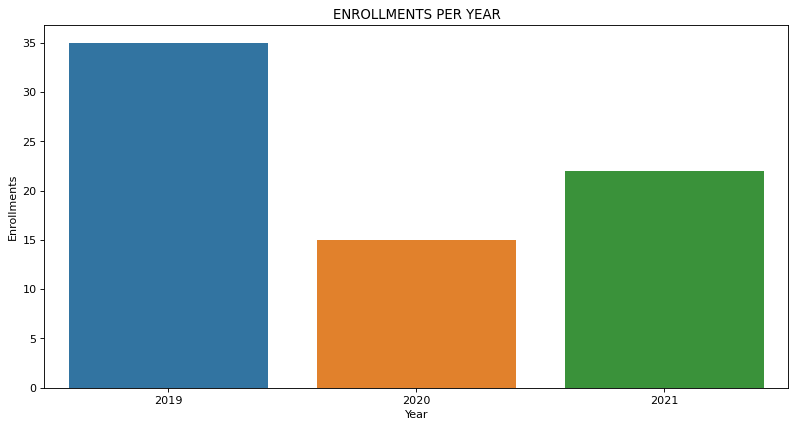

In [10]:
#Enrollment Data per Year
plt.figure(figsize=(12, 6), dpi=80) 
sns.countplot(df['start_date']).set(title = "ENROLLMENTS PER YEAR")
plt.xlabel('Year')
plt.ylabel('Enrollments')

C:\Users\rcheatham\Anaconda3\envs\pandas_playground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


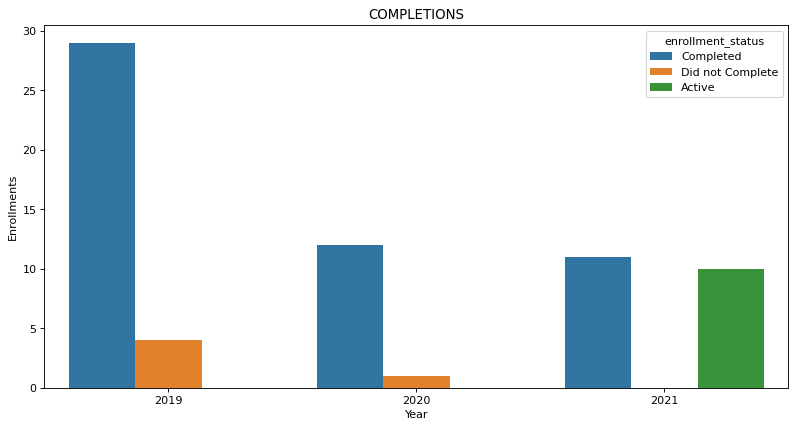

In [11]:
#Program Completion Status by year
plt.figure(figsize=(12, 6), dpi=80) 
sns.countplot(df['start_date'], hue = df["enrollment_status"], hue_order = ["Completed", "Did not Complete",
        "Active"]).set(title = "COMPLETIONS")
plt.xlabel('Year')
plt.ylabel('Enrollments')
plt.savefig('Completion Rate.png')

C:\Users\rcheatham\Anaconda3\envs\pandas_playground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


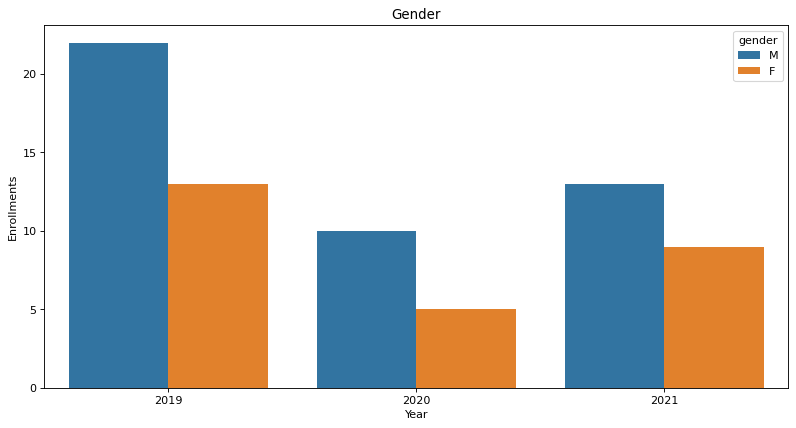

In [12]:
#Enrollment by gender each program year 
plt.figure(figsize=(12, 6), dpi=80) 
sns.countplot(df["start_date"], hue = df["gender"]).set(title = "Gender")
plt.xlabel('Year')
plt.ylabel('Enrollments')
plt.savefig('Gender.png')

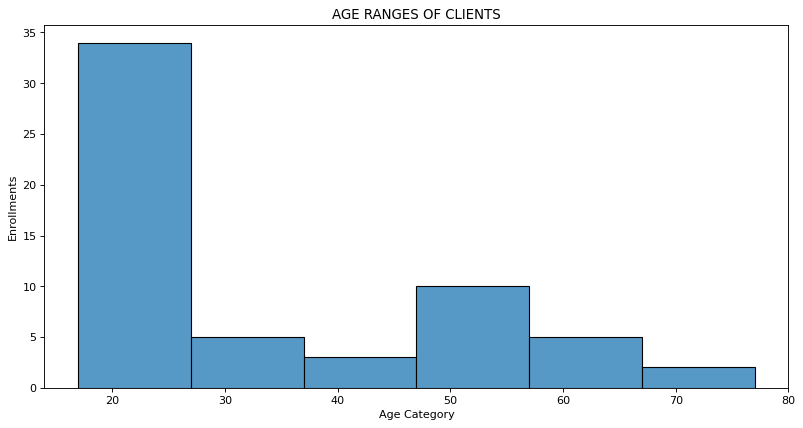

In [13]:
#Age ranges of program clients
plt.figure(figsize=(12, 6), dpi=80)
sns.histplot(df['Age'], binwidth=10).set(title = "AGE RANGES OF CLIENTS")
plt.xlabel('Age Category')
plt.ylabel('Enrollments')
plt.savefig('Age.png')

In [14]:
df["Age"].median() #median Age 

20.0

In [15]:
df["Age"].mean() #Mean Age

31.677966101694917

C:\Users\rcheatham\Anaconda3\envs\pandas_playground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


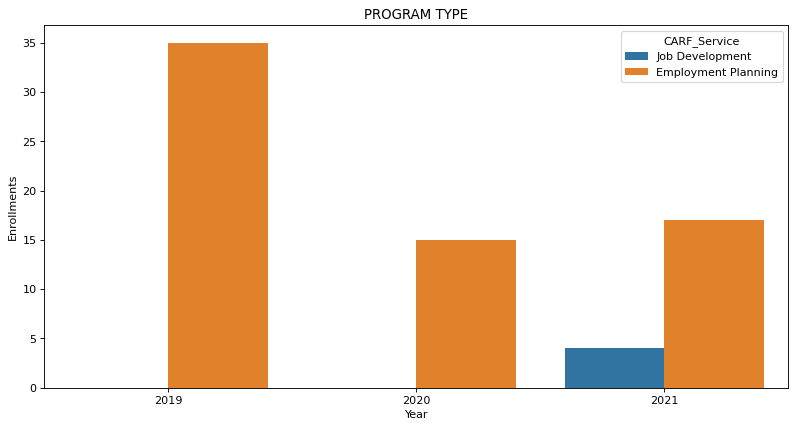

In [16]:
#Type of program clients participated in by year
plt.figure(figsize=(12, 6), dpi=80)
sns.countplot(df['start_date'], hue = df["CARF_Service"]).set(title = "PROGRAM TYPE")#CARF Categories
plt.xlabel('Year')
plt.ylabel('Enrollments')
plt.savefig('Service Type.png')

C:\Users\rcheatham\Anaconda3\envs\pandas_playground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


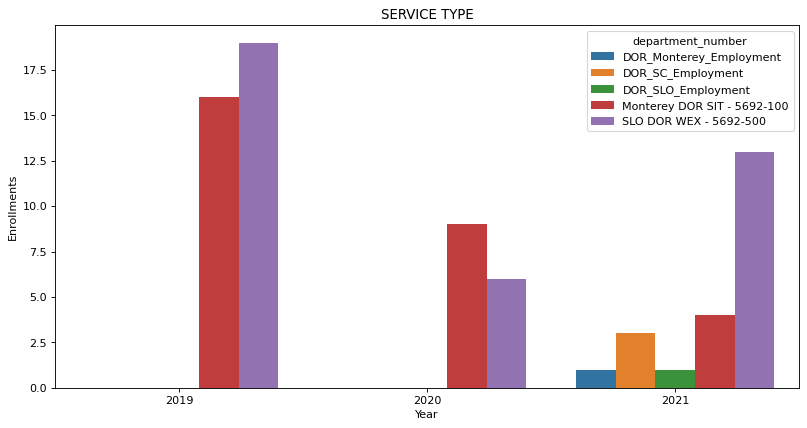

In [17]:
#The type of DOR program clients participated in by year
plt.figure(figsize=(12, 6), dpi=80)
sns.countplot(df['start_date'], hue = df["department_number"]).set(title = "SERVICE TYPE")
plt.xlabel('Year')
plt.ylabel('Enrollments')
plt.savefig('Specific Service.png')

C:\Users\rcheatham\Anaconda3\envs\pandas_playground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


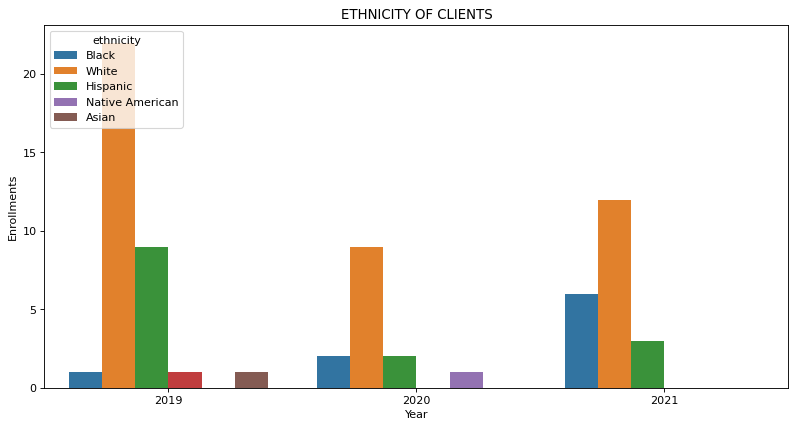

In [18]:
#Ethnicity of program participants by year
plt.figure(figsize=(12, 6), dpi=80)
sns.countplot(df['start_date'], hue = df["ethnicity"]).set(title = "ETHNICITY OF CLIENTS")#CARF Categories
plt.xlabel('Year')
plt.ylabel('Enrollments')
plt.savefig('Ethnicity.png')

C:\Users\rcheatham\Anaconda3\envs\pandas_playground\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


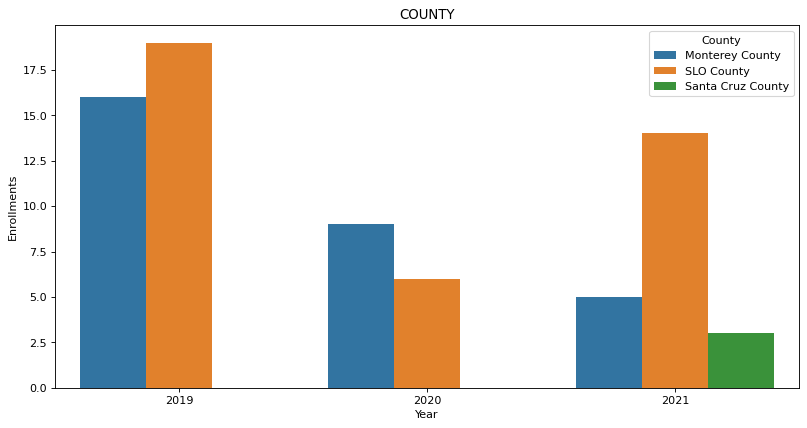

In [19]:
#The program County clients participated in by year
plt.figure(figsize=(12, 6), dpi=80)
sns.countplot(df['start_date'], hue = df["County"], hue_order=["Monterey County","SLO County",
"Santa Cruz County"]).set(title = "COUNTY") #CARF Categorie
plt.xlabel('Year')
plt.ylabel('Enrollments')
plt.savefig('County.png')

In [20]:
df.to_excel("CARF FINAL.xlsx") #sent final df to excel worksheet